<a href="https://colab.research.google.com/github/bmosc12/Thinkful/blob/main/Divvy_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be looking at data from the ride share company Divvy. Divvy is a bike and scooter rental company with kiosks set up all over major cities. They have provided a years worth of bike rental data from rides all around Chicago. I am hoping by exploring this data I will be able to garner insights to help Divvy decide how to best move forward.

To begin, I imported all necessary libraries and uploaded the CSV file with the data. I then checked the file for issues, incomplete data, or duplicate data. 

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import datetime as dt
import math

# Connect the correct drive in order to upload the CSV files
from google.colab import drive
drive.mount('/content/gdrive')

# Upload CSV
df = pd.read_csv('/content/gdrive/My Drive/Combined Divvy/combined-divvy-files.csv')

# Check for file for issues and duplicates
# df.info()
# df.head()
# df.duplicated()

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


After looking at the data, I decided to get rid of null values. These all stemmed from incomplete data, typically with missing end times or ending locations. I decided it was better to drop the nulls since I don't know what caused the missing data and couldn't trust those particular rides to be correct.

In [ ]:
# Drop unused columns
df = df.drop(['start_lat', 'end_lat', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lng', 'end_lng'], axis = 1)

In [ ]:
# Get rid of Nulls
df = df.dropna()

There were 12 originical CSV files which were combined and the headers from each file are now stuck inside the dataframe so I need to find and get rid of those.

In [ ]:
df = df[(df['member_casual'] != 'member_casual')]
df = df[(df['ride_id'] != 'ride_id')]
df = df[(df['rideable_type'] != 'rideable_type')]
df = df[(df['started_at'] != 'started_at')]
df = df[(df['ended_at'] != 'ended_at')]

Following this I set up new columns in order to make important comparisons as well as for graphing purposes.

In [ ]:
# Convert start and end times to timestamps
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
# Create new columns for comparing months and days
df['month_year'] = pd.DatetimeIndex(df['started_at'])
df['month_year'] = df['month_year'].dt.strftime('%m %y')
df['day'] = df['started_at'].dt.strftime('%A')
# Create column to split weekdays and weekends
df['day_end'] = df['day'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')
# Try to get a day of the week and a week number to compare them week over week
df['day_week'] = df['started_at'].dt.strftime('%A %U')
# Create new columns for the durations of the rides
df['seconds'] = (df.ended_at - df.started_at) / pd.Timedelta(seconds=1)
df['mins'] = df.seconds / 60
df['hours'] = df.mins / 60

I dug deeper into the seconds column and found a lot of values which had negative durations for the rentals which isn't possible and must be an error in the data so I decided to get rid of those. I also looked up the max possible time for a rental which is three hours so I decided to get rid of any data exceeding that number. Then I set up order variables for easier graphing.

In [ ]:
# Do a quick check of the seconds column
# df['seconds'].describe()

# Find all negative or 0 second durations
# df.iloc[(df['seconds'] <= 0).values]

# Find all rides which were over the maximum alloted rental time
# df.iloc[(df['seconds'] > 10800).values]

# Get rid of all negative, 0 duration, and rides longer than 10,800 (the max individual rental time).
df = df[(df['seconds'] > 0)]
df = df[(df['seconds'] <= 10800)]
# .03% of rides went over the 3 hours mark so I felt ok getting rid of them

In [ ]:
#  Verify that it worked
df.iloc[(df['seconds'] <= 0).values]
df.iloc[(df['seconds'] > 10800).values]

In [ ]:
# Make order variables to use for graphing
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekend_order = ['Saturday', 'Sunday']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

I made two new dataframes, one with only member data and one with only casual rider data. I did this so I could compare the two rider types to one another and make some visual representations of this. I began by breaking the data into the two different dataframes, and then looking at an overview of the data before moving on to graphing and statistical testing. I specifically wanted to look at the total number of rides for each group, the number of rides by day of the week, the number of rides by month, as well as a look at the average time the rides last.

In [ ]:
# Split into 2 dfs, one for members and the other for casual riders
members_df = df.iloc[(df['member_casual'] == 'member').values]
casual_df = df.iloc[(df['member_casual'] == 'casual').values]

In [ ]:
df.groupby('member_casual')['mins'].mean()

member_casual
casual    22.351323
member    12.318157
Name: mins, dtype: float64

In [ ]:
# Make the chart size bigger for easier readability
sns.set(rc = {'figure.figsize':(15,8)})

(-5.0, 75.0)

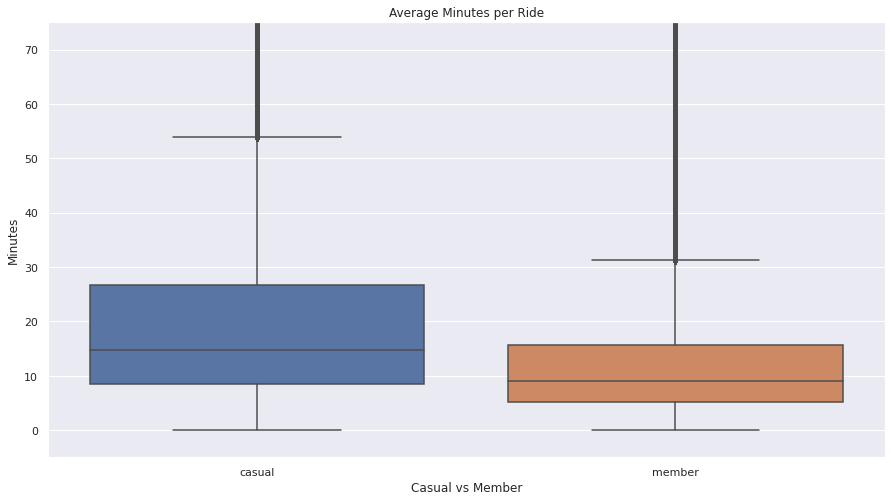

In [ ]:
# Boxplot showing average minutes per ride based on rider group
b = sns.boxplot(data = df, y = 'mins', x = 'member_casual')
b.set(xlabel = 'Casual vs Member', ylabel = 'Minutes', title = 'Average Minutes per Ride')
b.set_ylim(-5, 75)

[Text(0, 0.5, 'Number of Rides in Millions'),
 Text(0.5, 0, 'Casual vs Member'),
 Text(0.5, 1.0, 'Total Number of Rides')]

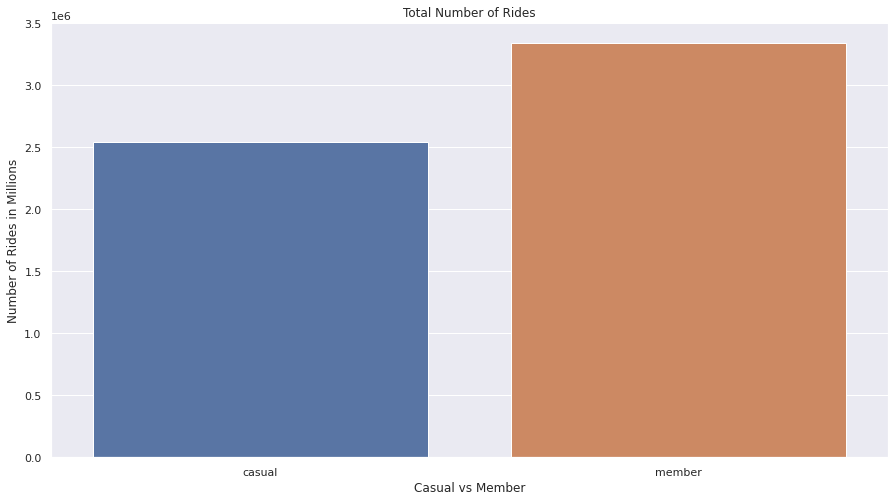

In [ ]:
# Countplot of the total number of rides 
b2 = sns.countplot(data = df, x = 'member_casual')
b2.set(xlabel = 'Casual vs Member', ylabel = 'Number of Rides in Millions', title = 'Total Number of Rides')

The chart below displays the number of rides split out by day of the week as well as by members vs casual riders. As you can see, the members are more consistent with the number of daily rides, but ride less on weekends. The casual riders, in turn, tend to rent more bikes on the weekends but have a bigger drop off during the week.

[Text(0, 0.5, 'Count of Rides'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Number of Rides by Day')]

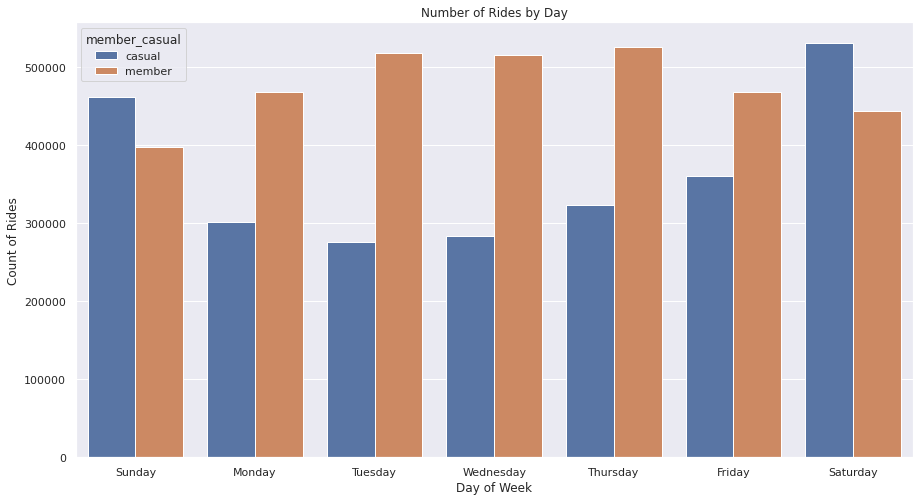

In [ ]:
# Show the number of rides per day by group
c = sns.countplot(data = df, x = 'day', hue = 'member_casual', order = order)
c.set(xlabel = 'Day of Week', ylabel = 'Count of Rides', title = 'Number of Rides by Day')

In [ ]:
# The numbers for the above plot
df.groupby(['day', 'member_casual'])['ride_id'].count()

day        member_casual
Friday     casual           360490
           member           468658
Monday     casual           301441
           member           468496
Saturday   casual           530766
           member           443508
Sunday     casual           462341
           member           398277
Thursday   casual           322884
           member           525317
Tuesday    casual           275923
           member           517630
Wednesday  casual           283678
           member           516020
Name: ride_id, dtype: int64

In [ ]:
# Check out the minutes columns
df.groupby('member_casual')['mins'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2537523.0,22.351323,23.691347,0.016667,8.416667,14.716667,26.633333,180.00
member,3337906.0,12.318157,11.281456,0.016667,5.250000,9.050000,15.700000,179.95


This chart is showing the number of rides broken down by month. While there are fewer rentals overall during the winter months, this is especially true of casual riders. They see peak numbers of rentals of around 380,000 in July drop all the way down to roughly 5,000 to 10,000 in January.

[Text(0, 0.5, 'Count of Rides'),
 Text(0.5, 0, 'Month and Year'),
 Text(0.5, 1.0, 'Number of Rides by Month')]

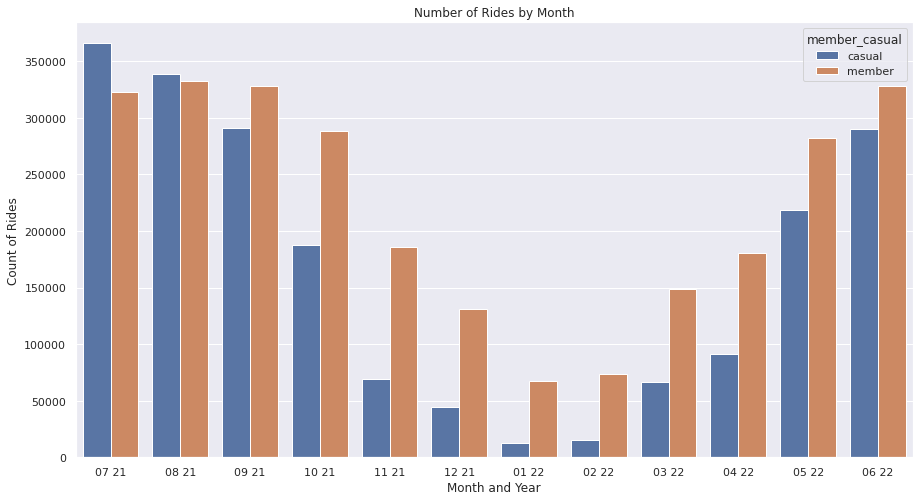

In [ ]:
# The count of rides by month per group
d = sns.countplot(data = df, x = 'month_year', hue = 'member_casual')
d.set(xlabel = 'Month and Year', ylabel = 'Count of Rides', title = 'Number of Rides by Month')

[Text(0, 0.5, 'Minutes'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Average Minutes per Ride by Day')]

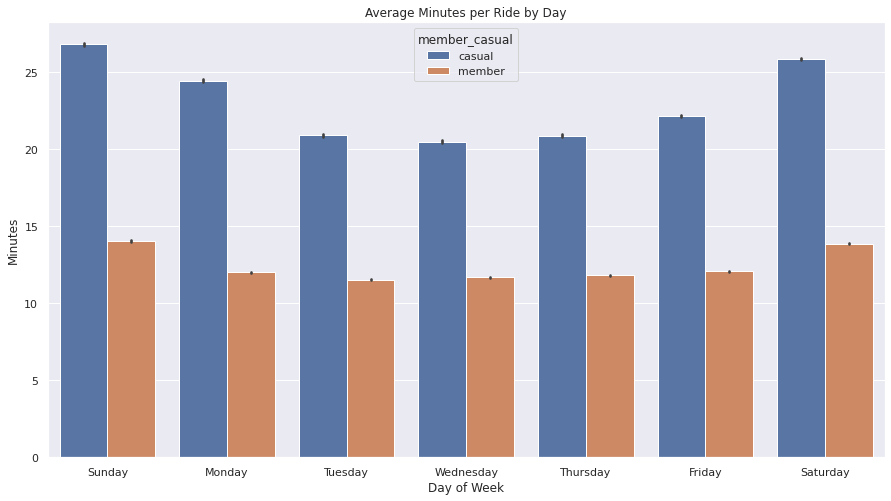

In [ ]:
# Barplot showing the average minutes per ride broken down by day and user group
e = sns.barplot(data = df, x = 'day', y ='mins', hue = 'member_casual', order = order)
e.set(xlabel = 'Day of Week', ylabel = 'Minutes', title = 'Average Minutes per Ride by Day')

In [ ]:
df.groupby(['day', 'member_casual'])['mins'].mean()

day        member_casual
Friday     casual           20.990119
           member           12.094221
Monday     casual           22.982095
           member           11.977082
Saturday   casual           24.582628
           member           13.750961
Sunday     casual           25.491811
           member           13.884807
Thursday   casual           19.827833
           member           11.823134
Tuesday    casual           19.808450
           member           11.535540
Wednesday  casual           19.463237
           member           11.679561
Name: mins, dtype: float64

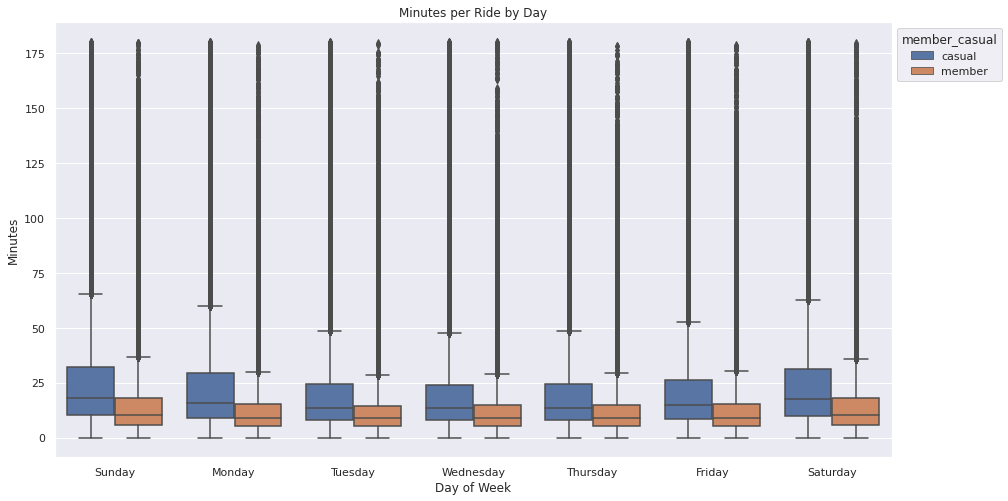

In [ ]:
# Boxplot showing the average ride time by day and user group
f = sns.boxplot(data = df, x = 'day', y = 'mins', hue = 'member_casual', order = order)
f.set(xlabel = 'Day of Week', ylabel = 'Minutes', title = 'Minutes per Ride by Day')
# Move the legend outside of the chart
sns.move_legend(f, "upper left", bbox_to_anchor = (1,1))

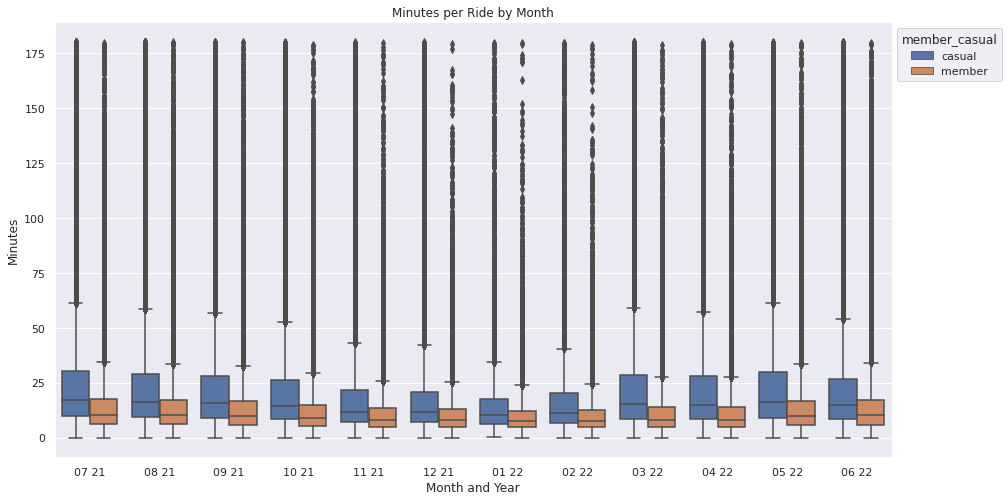

In [ ]:
# Boxplot showing the average ride time by month and user type
g = sns.boxplot(data = df, y = 'mins', x = 'month_year', hue = 'member_casual')
g.set(xlabel = 'Month and Year', ylabel = 'Minutes', title = 'Minutes per Ride by Month')
# g.set_ylim(-5,75)
# Move the legend outside of the chart
sns.move_legend(g, "upper left", bbox_to_anchor = (1,1))

After my initial review I think it would be helpful to dig deeper into certain areas, specifically comparing casual riders to members. At first glance, it appears that members are much more consistent with the number of daily rides as well as the average ride time both day by day and month by month. Casual riders, however, tend to ride more on the weekends and during the warm months.

All of this leads me to believe it is worth investigating these areas further to determine if these differences are statistically significant or not. I will start by comparing the mean ride time between members and casual riders with a T test. My two hypotheses are:

Null Hypothesis: The mean ride duration is the same between member riders and casual riders.

Alternate Hypothesis: There will be a difference between the two means.

In [ ]:
# Check the means again before running a T test
df.groupby('member_casual')['mins'].mean()

member_casual
casual    23.626372
member    12.334794
Name: mins, dtype: float64

In [ ]:
# Run a T-test on the mean durations between the two groups
scipy.stats.ttest_ind(casual_df['mins'], members_df['mins'])

Ttest_indResult(statistic=572.3078904838624, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_1_n = members_df.shape[0]
sample_2_n = casual_df.shape[0]
sample_1_mean = members_df['mins'].mean()
sample_2_mean = casual_df['mins'].mean()
sample_1_var = members_df['mins'].var()
sample_2_var = casual_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 11.254644470516203 and 11.328511319480233.


Based on the large T statistic and a P value of 0 we can reject the null hypothesis that there is no difference in the mean ride times of the two groups. We can also say with 95% confidence that the difference in means is between 11.25 and 11.32. 

Next, I decided to compare weekday rides to those on weekends. I made two new dataframes - one for weekdays and another for weekends - in order to do some comparisons and for better plotting. From there I examined the ride time data and did some graphing as well as statistical testing on it. Please note - these dataframes have both members and casual rider data within them.

In [ ]:
# Make a data frame with just weekdays
weekday_df = df[df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
# Make a data frame with just weekends
weekend_df = df[df['day'].isin(['Saturday', 'Sunday'])]

In [ ]:
# A quick check of the duration from the weekday df
weekday_df['mins'].describe()

count    3.185931e+06
mean     1.551852e+01
std      1.719155e+01
min      1.666667e-02
25%      6.083333e+00
50%      1.046667e+01
75%      1.838333e+01
max      1.800000e+02
Name: mins, dtype: float64

In [ ]:
# A quick check of the duration from the weekend df
weekend_df['mins'].describe()

count    1.476018e+06
mean     2.070330e+01
std      2.220125e+01
min      1.666667e-02
25%      7.700000e+00
50%      1.381667e+01
75%      2.501667e+01
max      1.800000e+02
Name: mins, dtype: float64

In [ ]:
# Set a consistent hue order for better visuals
hue_order = ['casual', 'member']

[Text(0, 0.5, 'Rides'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Number of Rides by Weekday')]

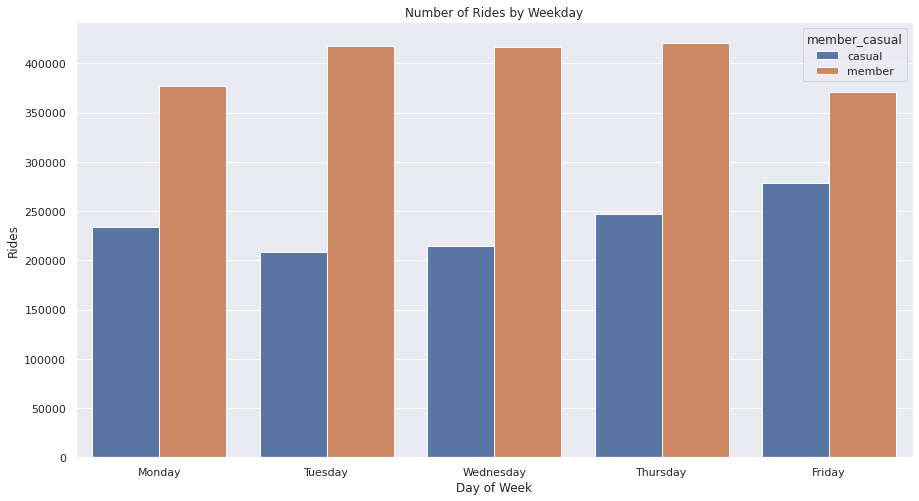

In [ ]:
# A count of the number of rides by weekday for each rider group
h = sns.countplot(data = weekday_df, x = 'day', hue = 'member_casual', order = weekday_order, hue_order = hue_order)
h.set(xlabel = 'Day of Week', ylabel = 'Rides', title = 'Number of Rides by Weekday')

[Text(0, 0.5, 'Minutes'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Minutes per Ride by Weekday')]

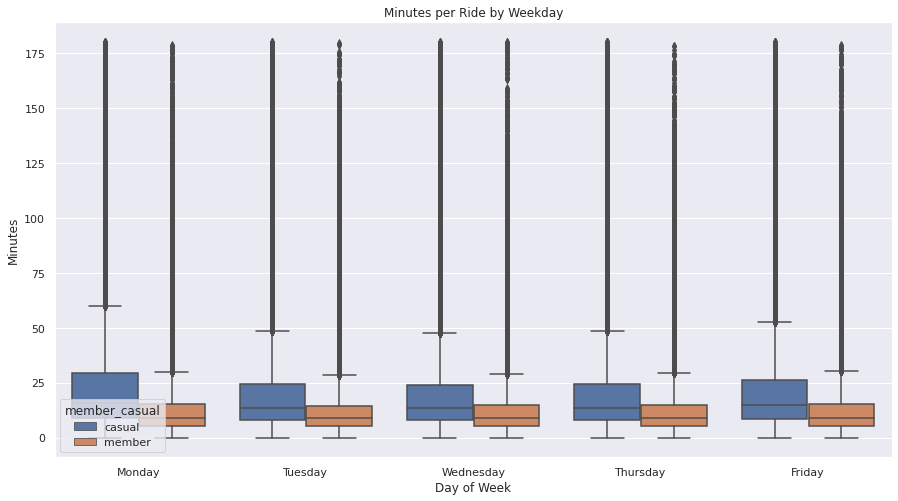

In [ ]:
# Plot the average ride time by day and type of rider
i = sns.boxplot(data=weekday_df, y = 'mins', x = 'day', hue = 'member_casual', order = weekday_order, hue_order = hue_order)
i.set(xlabel = 'Day of Week', ylabel = 'Minutes', title = 'Minutes per Ride by Weekday')

[Text(0, 0.5, 'Rides'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Number of Rides by Weekend')]

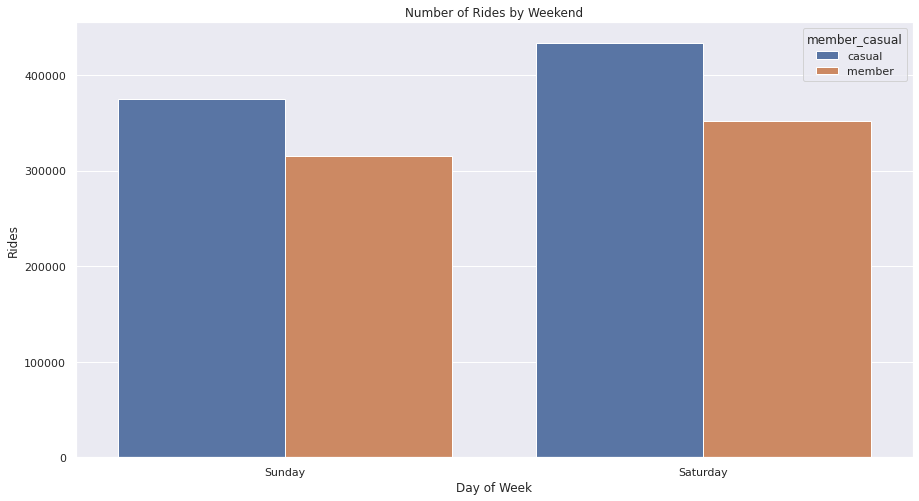

In [ ]:
# The count of rides on weekends by member group
j = sns.countplot(data = weekend_df, x = 'day', hue = 'member_casual', hue_order = hue_order)
j.set(xlabel = 'Day of Week', ylabel = 'Rides', title = 'Number of Rides by Weekend')

[Text(0, 0.5, 'Minutes'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Minutes per Ride by Weekend')]

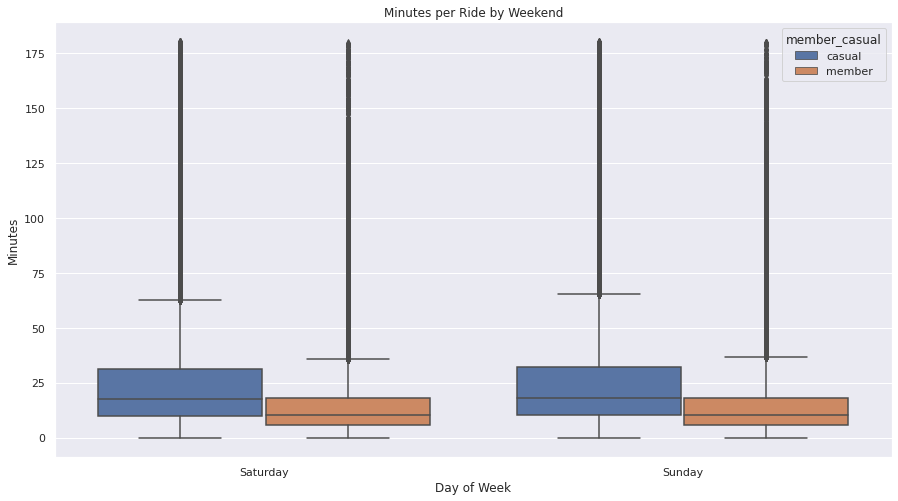

In [ ]:
# Plot the average ride time by day and type of rider
k = sns.boxplot(data=weekend_df, y = 'mins', x = 'day', hue = 'member_casual', order = weekend_order, hue_order = hue_order)
k.set(xlabel = 'Day of Week', ylabel = 'Minutes', title = 'Minutes per Ride by Weekend')

[Text(0, 0.5, 'Minutes'),
 Text(0.5, 0, 'Time of Week'),
 Text(0.5, 1.0, 'Minutes per Ride by Time of Week')]

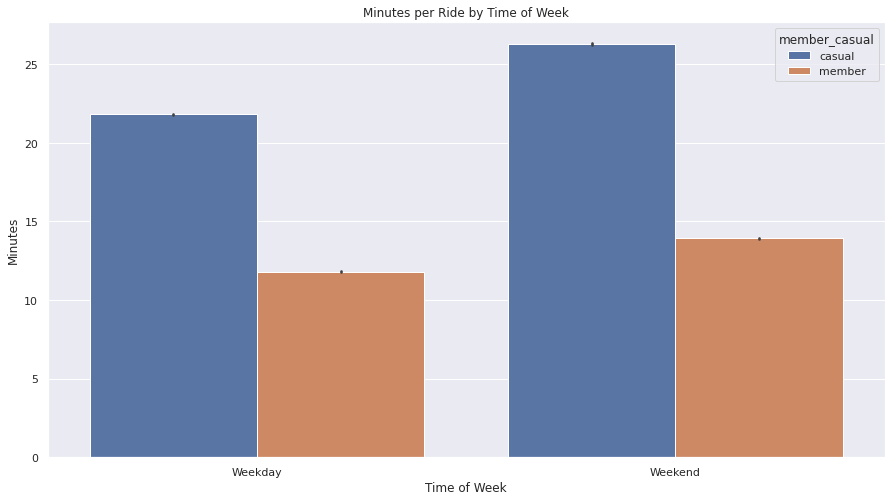

In [ ]:
# A barplot of the average ride time split by time of week and user type
b2 = sns.barplot(data = df, y = 'mins', x = 'day_end', hue = 'member_casual')
b2.set(xlabel = 'Time of Week', ylabel = 'Minutes', title = 'Minutes per Ride by Time of Week')

[Text(0, 0.5, 'Rides'),
 Text(0.5, 0, 'Time of Week'),
 Text(0.5, 1.0, 'Number of Rides by Time of Week')]

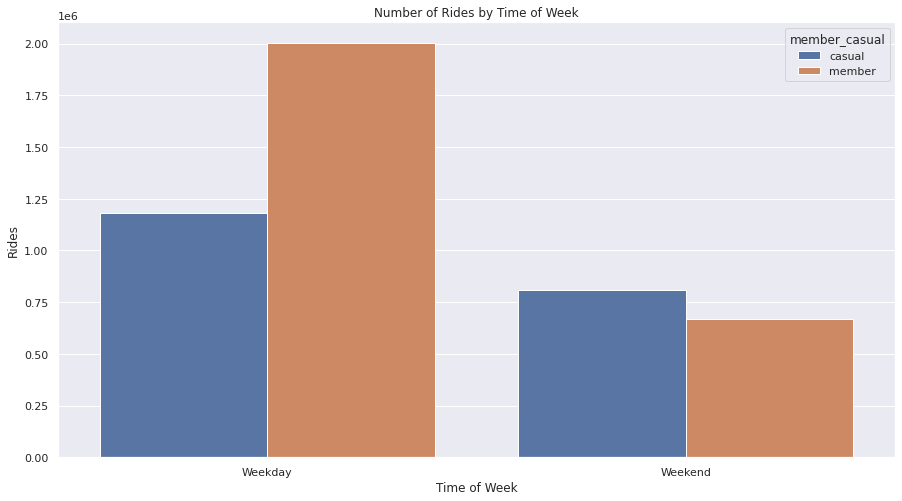

In [ ]:
j2 = sns.countplot(data = df, x = 'day_end', hue = 'member_casual', hue_order = hue_order)
j2.set(xlabel = 'Time of Week', ylabel = 'Rides', title = 'Number of Rides by Time of Week')

In [ ]:
members_df.groupby('day_end')['mins'].count()

day_end
Weekday    2496121
Weekend     841785
Name: mins, dtype: int64

In [ ]:
casual_df.groupby('day_end')['mins'].count()

day_end
Weekday    1544416
Weekend     993107
Name: mins, dtype: int64

In [ ]:
# Set up a data frame to plot the average daily rides split into weekdays vs weekends. So weekend rides would be the total /(2 * 52) ((# of days per weekend) * (# of weeks of data))
# weekday rides would be total /(5 * 52). ((# of weekdays) * (# of weeks of data))
df2 = pd.DataFrame()
data = [['Weekday', (2496121/260), 'member'], ['Weekend', (841785/104), 'member'], ['Weekday', (1544416/260), 'casual'], ['Weekend', (993107/104), 'casual']]
df2 = pd.DataFrame(data, columns = ['day_end', 'mins', 'member_casual'])

[Text(0, 0.5, 'Average Rides per Day'),
 Text(0.5, 0, 'Time of Week'),
 Text(0.5, 1.0, 'Average Daily Rides by Time of Week')]

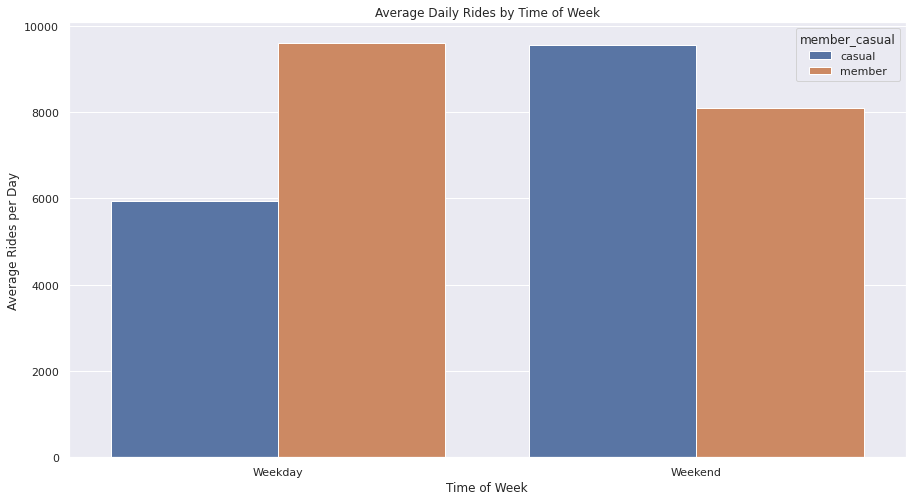

In [ ]:
# Barplot showing the average rides per day on weekend days or weekday days
ba = sns.barplot(data = df2, x = 'day_end', y = 'mins', hue = 'member_casual', hue_order = hue_order)
ba.set(xlabel = 'Time of Week', ylabel = 'Average Rides per Day', title = 'Average Daily Rides by Time of Week')

(-5.0, 75.0)

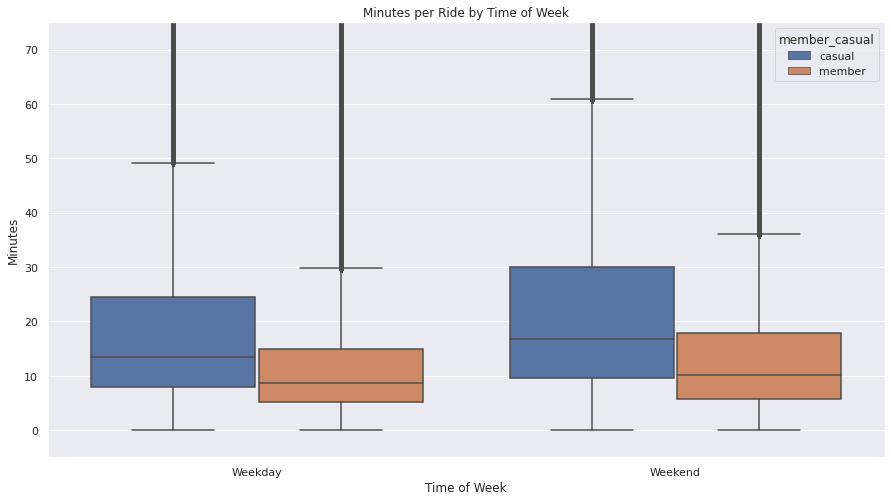

In [ ]:
# Plot the average ride time by week and type of rider
k2 = sns.boxplot(data=df, y = 'mins', x = 'day_end', hue = 'member_casual', hue_order = hue_order)
k2.set(xlabel = 'Time of Week', ylabel = 'Minutes', title = 'Minutes per Ride by Time of Week')
k2.set_ylim(-5,75)

After looking at the graphs I could see a difference in the mean ride times of the two groups as well as potentially on weekdays vs weekends. Because of this, I felt it was worth running a T test to determine whether the difference was statistically significant or not. I set up a null and alternate hypothesis and ran the test.

Null hypothesis: There is no difference in the mean ride time on weekends vs weekdays.

Alternate hypothesis:There is a statistical difference in the mean ride times.

In [ ]:
# Check the means
df.groupby('day_end')['mins'].mean()

day_end
Weekday    15.518524
Weekend    20.703298
Name: mins, dtype: float64

In [ ]:
# Run a T-Test of the mean ride times on the weekends vs weekdays
scipy.stats.ttest_ind(weekend_df['mins'], weekday_df['mins'])

Ttest_indResult(statistic=275.20084705284097, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_2_n = weekend_df.shape[0]
sample_1_n = weekday_df.shape[0]
sample_2_mean = weekend_df['mins'].mean()
sample_1_mean = weekday_df['mins'].mean()
sample_2_var = weekend_df['mins'].var()
sample_1_var = weekday_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 5.144286779305655 and 5.225261392732407.


From these tests we can reject the null hypothesis that there is no difference in means with a high T statistic and a 0 for the P value. Furthere, we can say with a 95% confidence interval that the mean difference is roughly 5. 

Next I wanted to look specifically at the difference in weekend rides between the groups and the difference in weekday rides between the groups. First, I needed to set up individual dataframes in order to run the tests. Next I set up the T tests, the first of which was a comparison of weekday rides.

Null Hypothesis: The mean ride times of each group is no different for weekday rides.

Alternate Hypothesis: The mean ride time is different between the two groups.bold text

In [ ]:
# Set up new Dataframes splitting members and casual riders by weekend vs weekday numbers
end_mem_df = weekend_df.iloc[(weekend_df['member_casual'] == 'member').values]
day_mem_df = weekday_df.iloc[(weekday_df['member_casual'] == 'member').values]
end_cas_df = weekend_df.iloc[(weekend_df['member_casual'] == 'casual').values]
day_cas_df = weekday_df.iloc[(weekday_df['member_casual'] == 'casual').values]

In [ ]:
# Check the means before a T test
weekday_df.groupby('member_casual')['mins'].mean()

member_casual
casual    21.810132
member    11.801269
Name: mins, dtype: float64

In [ ]:
# Run a T-Test comparing the mean ride times of members and casual riders on weekdays
scipy.stats.ttest_ind(day_cas_df['mins'], day_mem_df['mins'])

Ttest_indResult(statistic=523.2346276437729, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_1_n = day_mem_df.shape[0]
sample_2_n = day_cas_df.shape[0]
sample_1_mean = day_mem_df['mins'].mean()
sample_2_mean = day_cas_df['mins'].mean()
sample_1_var = day_mem_df['mins'].var()
sample_2_var = day_cas_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 9.964136722595837 and 10.053588799467908.


These tests show we can reject the null hypothesis that there is no difference in means with a high T statistic and a 0 for the P value. Furthere, we can say with a 95% confidence interval that the mean difference is about 10.

Following that, I looked at the mean ride times on weekends between each group with the following hypotheses:

Null Hypothesis: The mean weekend ride time is the same between each group.

Alternate Hypothesis: The mean weekend ride time differs between the two groups.

In [ ]:
# Get the means
weekend_df.groupby('member_casual')['mins'].mean()

member_casual
casual    26.282909
member    13.936599
Name: mins, dtype: float64

In [ ]:
scipy.stats.ttest_ind(end_cas_df['mins'], end_mem_df['mins'])

Ttest_indResult(statistic=349.91587429000685, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_1_n = end_mem_df.shape[0]
sample_2_n = end_cas_df.shape[0]
sample_1_mean = end_mem_df['mins'].mean()
sample_2_mean = end_cas_df['mins'].mean()
sample_1_var = end_mem_df['mins'].var()
sample_2_var = end_cas_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 12.28124424770084 and 12.411375665127188.


Once again, we can reject the null hypothesis with a large T statistic and a 0 P value. We can also say with 95% confidence the mean difference is about 12.3.

For my last two T tests, I wanted to check member ride length during the week against member ride length on the weekends and then the same for casual riders. The hypotheses are the same for both.

Null Hypothesis: There is no difference in mean ride length during the week vs the weekend.

Alternate Hypothesis: There is a difference in the mean ride length during the week vs the weekend.

In [ ]:
end_mem_df['mins'].mean()

13.936598555830397

In [ ]:
day_mem_df['mins'].mean()

11.80126892789424

In [ ]:
scipy.stats.ttest_ind(end_mem_df['mins'], day_mem_df['mins'])

Ttest_indResult(statistic=138.61628621290728, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_2_n = end_mem_df.shape[0]
sample_1_n = day_mem_df.shape[0]
sample_2_mean = end_mem_df['mins'].mean()
sample_1_mean = day_mem_df['mins'].mean()
sample_2_var = end_mem_df['mins'].var()
sample_1_var = day_mem_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 2.1020256849136274 and 2.1686335709586864.


In [ ]:
end_cas_df['mins'].mean()

26.28290851224441

In [ ]:
day_cas_df['mins'].mean()

21.810131688926113

In [ ]:
scipy.stats.ttest_ind(end_cas_df['mins'], day_cas_df['mins'])

Ttest_indResult(statistic=125.1891330903266, pvalue=0.0)

In [ ]:
# More stats
# Set up necessary variables
sample_2_n = end_cas_df.shape[0]
sample_1_n = day_cas_df.shape[0]
sample_2_mean = end_cas_df['mins'].mean()
sample_1_mean = day_cas_df['mins'].mean()
sample_2_var = end_cas_df['mins'].var()
sample_1_var = day_cas_df['mins'].var()

# Calculate standard error and compute confidence intervals
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
mean_difference = sample_2_mean - sample_1_mean
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between " + str(ci_lower) + " and " + str(ci_upper) + ".")

The difference in means at the 95% confidence interval is between 4.401189028662495 and 4.544364617974102.


We can see in both of these tests we can reject the null hypothesis with high T statistics and P values of 0. The mean difference at a 95% confidence intervals are about 2.1 and 4.4 respectively. 

We covered a lot of information so here is a recap:
Members are much more consistent with their rides, both in mean ride time as well as the number of rides per day or month, but they do tend to ride for a longer time on the weekends. 
Casual users tend to ride for a much longer time on average but vary much more in the number of rides per day and month. They ride more often on weekends and during the warmer months. 
Overall, both groups ride for a longer average time and rent more bikes on the weekends and during the summer. 

Given all of this, I recommend looking into setting different rental rates depending on the day or time of year. Knowing casual users don't ride as often during the week, they could maybe get a discount on weekday rides to bring more riders in. Alternatively, weekend prices could be charged at a slight premium to capitalize on the additional rides. Members seem to be much more consistent with their rides (one theory is they use Divvy bikes to get to and from work) so they are less susceptible to these price changes. One idea, though, would be to set a weekday member rate for those who use Divvy for commuting, a weekend only member rate (or maybe weekend passes), and then a separate rate for anytime (full week access) members.